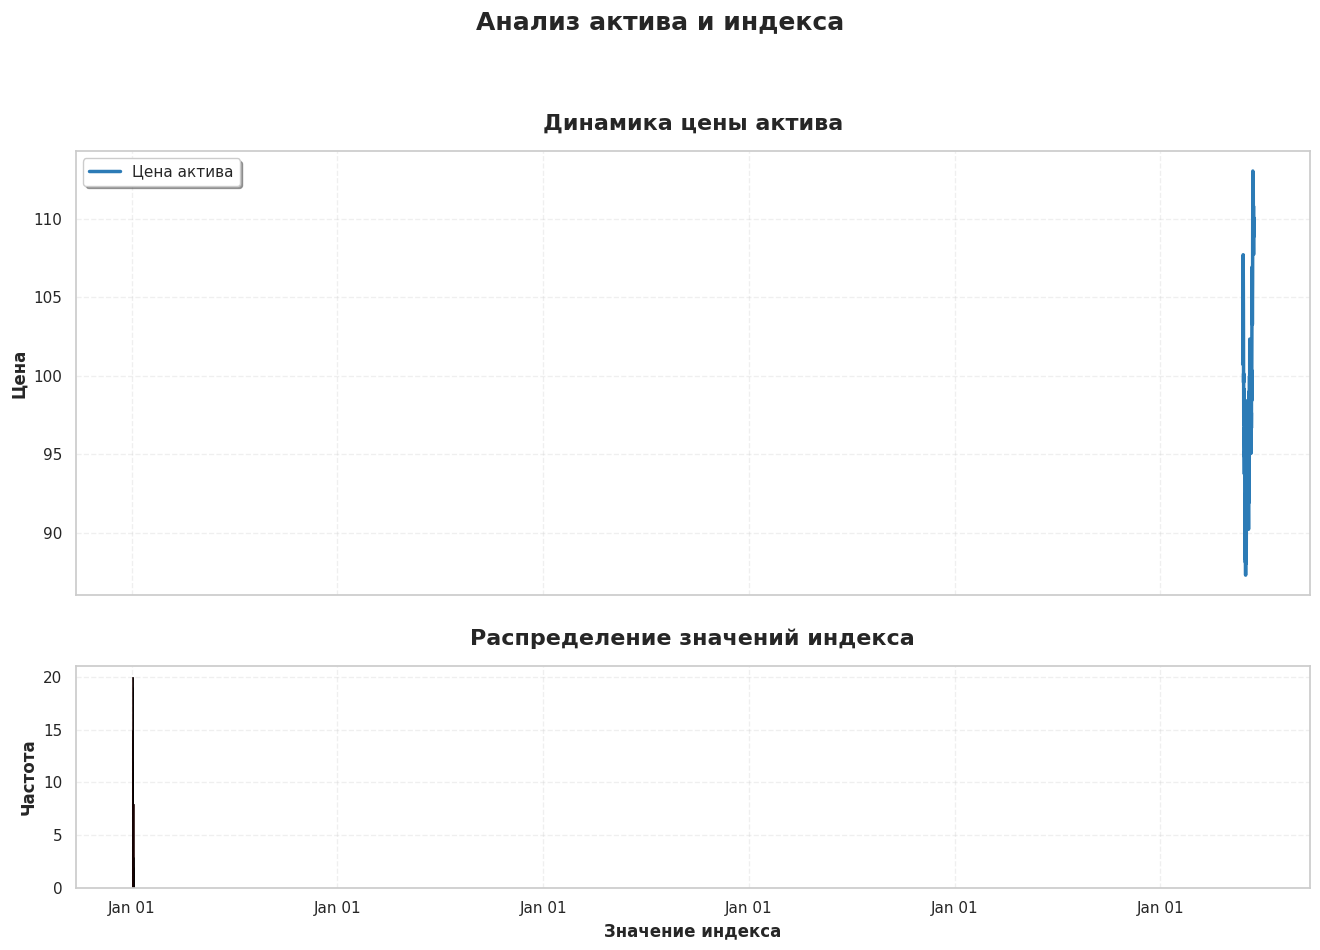

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# # Предположим, у вас есть DataFrame с данными
# data = pd.DataFrame({
#     'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
#     'Asset_Price': 100 + np.random.randn(100).cumsum() * 0.5,
#     'Index': np.random.randn(100).cumsum()
# })

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# # Верхний график — цена
# ax1.plot(data['Date'], data['Asset_Price'], color='#1f77b4', linewidth=2.5)
# ax1.set_title('Цена актива', fontsize=14, fontweight='bold')
# ax1.set_ylabel('Цена', fontsize=12)
# ax1.grid(True, alpha=0.3)

# # Нижний график — гистограмма
# ax2.hist(data['Index'], bins=25, color='#d62728', alpha=0.7, edgecolor='black')
# ax2.set_title('Распределение индекса', fontsize=14, fontweight='bold')
# ax2.set_ylabel('Частота', fontsize=12)
# ax2.set_xlabel('Индекс', fontsize=12)
# ax2.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()


# Генерируем пример данных
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=200, freq='D')

price = 100 + np.cumsum(np.random.normal(0.1, 1.5, 200))  # цена актива
index = np.cumsum(np.random.normal(0, 2, 200))           # индекс

data = pd.DataFrame({
    'Date': dates,
    'Asset_Price': price,
    'Index': index
})

# Настройка общего стиля
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'  # чёткий шрифт
plt.rcParams['figure.facecolor'] = 'white'


# Создаём фигуру с двумя подграфиками (вертикально)
fig, (ax1, ax2) = plt.subplots(
    2, 1,                         # 2 строки, 1 столбец
    figsize=(14, 10),          # общий размер
    sharex=True,               # общая ось X (даты)
    gridspec_kw={'height_ratios': [2, 1]}  # пропорции: верхний в 2 раза выше
)

# 1. Верхний график: цена актива (линейный)
sns.lineplot(
    data=data,
    x='Date',
    y='Asset_Price',
    ax=ax1,
    color='#2c7bb6',         # синий (цвета из палитры ColorBrewer)
    linewidth=2.5,
    label='Цена актива'
)

ax1.set_title(
    'Динамика цены актива', 
    fontsize=16,
    fontweight='bold',
    pad=15
)
ax1.set_ylabel('Цена', fontsize=12, fontweight='bold')
ax1.set_xlabel('')  # убираем подпись оси X (она будет внизу)
ax1.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')

# Форматирование дат на верхнем графике
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. Нижний график: гистограмма индекса
sns.histplot(
    data=data,
    x='Index',
    bins=20,
    ax=ax2,
    color='#d7191c',        # красный (из той же палитры)
    alpha=0.7,
    kde=False,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_title(
    'Распределение значений индекса',
    fontsize=16,
    fontweight='bold',
    pad=15
)
ax2.set_ylabel('Частота', fontsize=12, fontweight='bold')
ax2.set_xlabel('Значение индекса', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')

# Общие настройки
fig.suptitle(
    'Анализ актива и индекса',
    fontsize=18,
    fontweight='bold',
    y=0.98  # положение над графиками
)

plt.tight_layout(pad=3.0, h_pad=2.0)  # отступы между графиками
plt.show()
